# Regression and Classification Overview

## Speed, gender, and height of 1325 students

### Description
* 1,325 UCLA students were asked to fill out a survey where they were asked about their height, fastest speed they have ever driven, and gender.

### Format
* A data frame with 1325 observations on the following 3 variables.

### speed
* a numeric vector

### gender
* a factor with levels female and male

### height
* a numeric vector



https://www.openintro.org/data/index.php?data=speed_gender_height

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv("speed_gender_height.csv")

In [3]:
df.head()

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0


In [4]:
df.shape

(1325, 3)

## Data Exploration and Feature Engineering 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   1307 non-null   float64
 1   gender  1325 non-null   object 
 2   height  1320 non-null   float64
dtypes: float64(2), object(1)
memory usage: 31.2+ KB


In [6]:
df.isnull().sum()

speed     18
gender     0
height     5
dtype: int64

In [7]:
df.dropna()

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
...,...,...,...
1320,97.0,female,63.0
1321,100.0,female,66.0
1322,90.0,female,63.0
1323,90.0,male,69.0


In [8]:
df1 = df.dropna().copy()

In [9]:
df1.reset_index(drop=True, inplace =True)

In [10]:
df1.columns

Index(['speed', 'gender', 'height'], dtype='object')

In [11]:
df1.isnull().sum()

speed     0
gender    0
height    0
dtype: int64

In [12]:
df1.duplicated().sum()

827

In [13]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1297    False
1298     True
1299     True
1300     True
1301     True
Length: 1302, dtype: bool

In [14]:
#df1=df1.drop_duplicates()  #df1.loc[~df1.duplicated()]

<AxesSubplot:xlabel='gender', ylabel='count'>

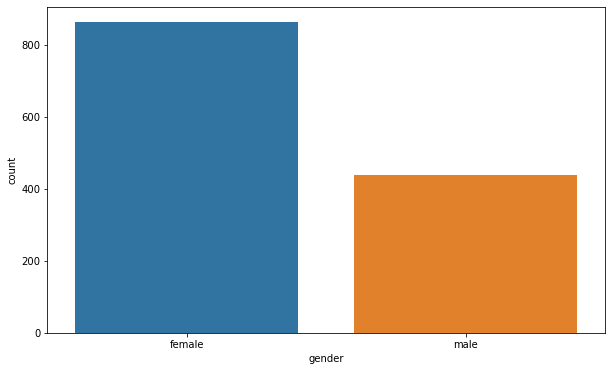

In [15]:
sns.countplot(x=df1.gender)

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,1302.0,90.751152,22.453939,0.0,80.0,90.0,100.0,185.0
height,1302.0,66.137174,4.049847,52.0,63.0,66.0,69.0,82.0


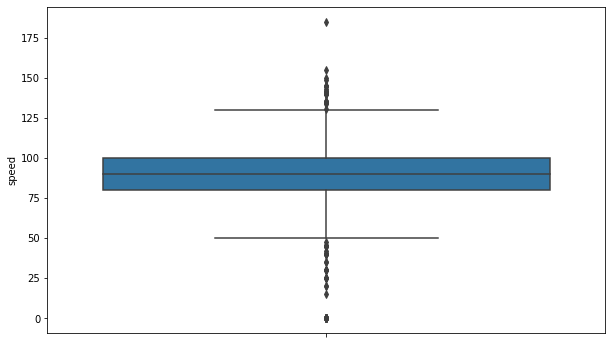

In [17]:
sns.boxplot( y= "speed", data = df1);

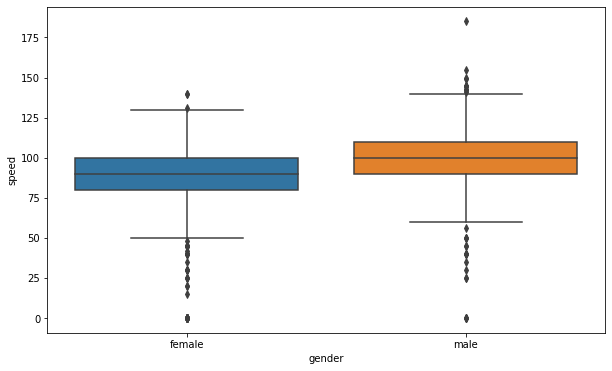

In [18]:
sns.boxplot(x = "gender", y= "speed", data = df1);

In [19]:
df1.groupby("gender").describe()

speed                                                       height  \
        count       mean        std  min   25%    50%    75%    max  count   
gender                                                                       
female  863.0  87.090382  21.462884  0.0  80.0   90.0  100.0  140.0  863.0   
male    439.0  97.947608  22.642335  0.0  90.0  100.0  110.0  185.0  439.0   

                                                           
             mean       std   min   25%   50%   75%   max  
gender                                                     
female  64.353882  2.991377  52.0  62.0  64.0  66.0  78.0  
male    69.642825  3.538760  52.0  68.0  70.0  72.0  82.0

### Outlier Detection

In [20]:
def outlier_counter(df = df1, groupby= "gender", target="female",col = "speed", threshold= 1.5):
    
    "This function counts and returns outliers upper and lower respectively in terms of specific target label. Beside that it returns outliers indexes"
    
    Q3= df.groupby(groupby).describe().loc[target].loc[col].loc["75%"]
    Q1= df.groupby(groupby).describe().loc[target].loc[col].loc["25%"]
    IQR = (Q3 - Q1) *threshold
    
    upper_count = df.loc[((df[col] > (Q3+IQR)) & (df[groupby] == target)),].count()[0]
    lower_count = df.loc[((df[col] < (Q1-IQR)) & (df[groupby] == target)),].count()[0]
    upper_count_index = df.loc[((df[col] > (Q3+IQR)) & (df[groupby] == target)),].index
    lower_count_index = df.loc[((df[col] < (Q1-IQR)) & (df[groupby] == target)),].index
    
    return lower_count,upper_count,np.array(lower_count_index),np.array(upper_count_index)
    

In [21]:
df1.loc[((df1.speed < 50) & (df1.gender == "male")),].count()[0]

14

In [22]:
df1.loc[((df1.speed > 150) & (df1.gender == "male")),].count()[0]

2

In [23]:
outlier_counter(target="male",col = "speed", threshold= 2)

(14,
 2,
 array([   1,   19,   32,   72,  214,  253,  588,  589,  590,  862, 1012,
        1017, 1034, 1130], dtype=int64),
 array([204, 290], dtype=int64))

In [24]:
outlier_counter(target="female",col = "speed", threshold = 2)

(30,
 0,
 array([  44,   49,   73,  130,  148,  160,  222,  395,  398,  423,  474,
         499,  559,  574,  642,  649,  677,  727,  799,  816,  836,  929,
        1048, 1052, 1054, 1096, 1124, 1159, 1275, 1294], dtype=int64),
 array([], dtype=int64))

In [25]:
a , b = outlier_counter(target="male",col = "speed", threshold= 2)[2:]
c = outlier_counter(target="female",col = "speed", threshold= 2)[2]

drop_indexes = np.concatenate((a,b,c))
print(f"These indexes are droped:\n {drop_indexes}")
df1.drop(index =drop_indexes)

These indexes are droped:
 [   1   19   32   72  214  253  588  589  590  862 1012 1017 1034 1130
  204  290   44   49   73  130  148  160  222  395  398  423  474  499
  559  574  642  649  677  727  799  816  836  929 1048 1052 1054 1096
 1124 1159 1275 1294]


,speed,gender,height
0,85.0,female,69.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
5,120.0,female,61.0
...,...,...,...
1297,97.0,female,63.0
1298,100.0,female,66.0
1299,90.0,female,63.0
1300,90.0,male,69.0


In [26]:
df1.drop(index =drop_indexes, inplace=True)

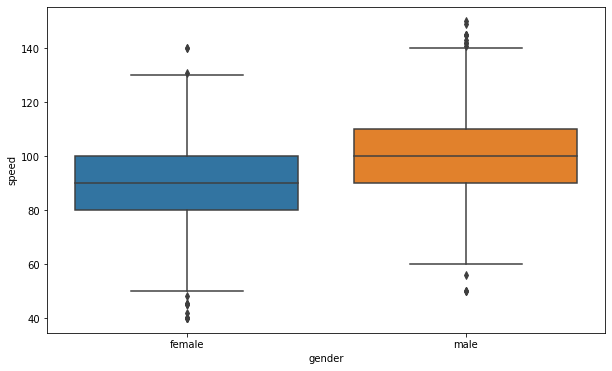

In [27]:
sns.boxplot(x = "gender", y= "speed", data = df1);

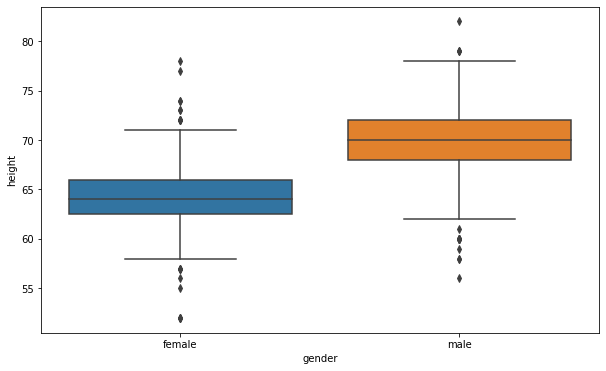

In [28]:
sns.boxplot(x = "gender", y= "height", data = df1);

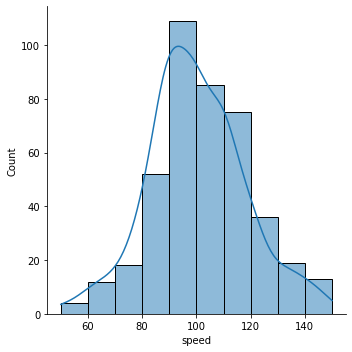

In [29]:
sns.displot(x = df1[df1.gender == "male"].speed, bins = 10, kde=True)

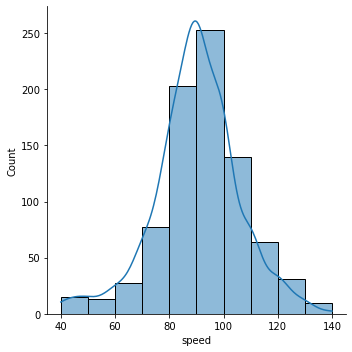

In [30]:
sns.displot(x = df1[df1.gender == "female"].speed, bins = 10, kde=True)

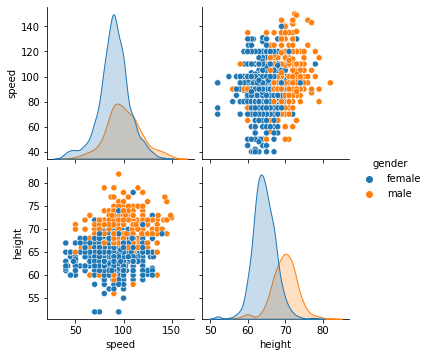

In [31]:
sns.pairplot(df1, hue='gender')

<AxesSubplot:>

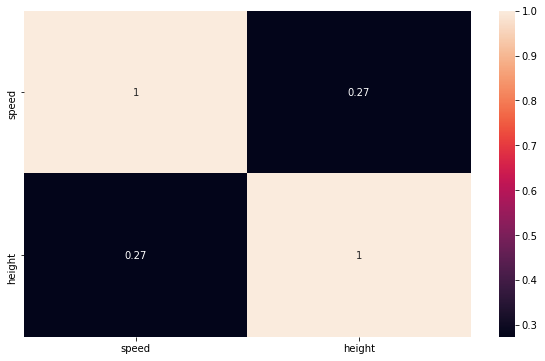

In [32]:
sns.heatmap(df1.corr(), annot=True)

# Classification Modelling 

### User defined functions

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score

### train-test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df1.drop("gender", axis = 1)
y = df1.gender

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify =y, random_state=101)

### Scaling 

In [39]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [40]:
from sklearn.pipeline import Pipeline
operations = [("scaler",RobustScaler()), ("log", LogisticRegression(class_weight='balanced',random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [41]:
pipe_log_model.fit(X_train,y_train)


Pipeline(steps=[('scaler', RobustScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [42]:
y_pred = pipe_log_model.predict(X_test)
l_acc = accuracy_score(y_test, y_pred)
l_f1 = f1_score(y_test, y_pred, average = "macro")

In [43]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[70 14]
 [ 6 36]]
              precision    recall  f1-score   support

      female       0.92      0.83      0.88        84
        male       0.72      0.86      0.78        42

    accuracy                           0.84       126
   macro avg       0.82      0.85      0.83       126
weighted avg       0.85      0.84      0.84       126


Train_Set
[[620 129]
 [ 65 316]]
              precision    recall  f1-score   support

      female       0.91      0.83      0.86       749
        male       0.71      0.83      0.77       381

    accuracy                           0.83      1130
   macro avg       0.81      0.83      0.81      1130
weighted avg       0.84      0.83      0.83      1130



In [44]:
pipe_log_model.named_steps.log.coef_

array([[0.26625615, 2.9411301 ]])

### Gridsearch for pipe_log_model

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'log__solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg'],
}
# penalty, default='l2'
# C : float, default=1.0
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
# The 'newton-cg','sag' and 'lbfgs' solvers support only l2 penalties. 
# 'elasticnet' is only supported by the 'saga' solver

In [46]:
operations = [("scaler",RobustScaler()), ("log", LogisticRegression(class_weight='balanced',random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring="f1_macro",
                              n_jobs=-1, cv=5)

In [47]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10],
                         'log__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'log__solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                         'newton-cg']},
             scoring='f1_macro', verbose=3)

In [48]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'saga'}

In [49]:
log_model_grid.best_score_

0.813385534145614

In [50]:
log_model_grid.best_estimator_.named_steps.log.coef_

array([[0.25924485, 3.00491151]])

In [51]:
y_pred = log_model_grid.predict(X_test)
l_grid_acc = accuracy_score(y_test, y_pred)
l_grid_f1 = f1_score(y_test, y_pred, average = "macro")

In [52]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[70 14]
 [ 6 36]]
              precision    recall  f1-score   support

      female       0.92      0.83      0.88        84
        male       0.72      0.86      0.78        42

    accuracy                           0.84       126
   macro avg       0.82      0.85      0.83       126
weighted avg       0.85      0.84      0.84       126


Train_Set
[[620 129]
 [ 65 316]]
              precision    recall  f1-score   support

      female       0.91      0.83      0.86       749
        male       0.71      0.83      0.77       381

    accuracy                           0.83      1130
   macro avg       0.81      0.83      0.81      1130
weighted avg       0.84      0.83      0.83      1130



https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [53]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

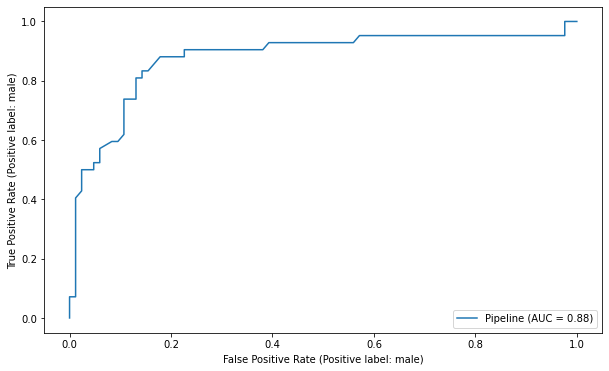

In [54]:
plot_roc_curve(pipe_log_model, X_test, y_test,pos_label="male")


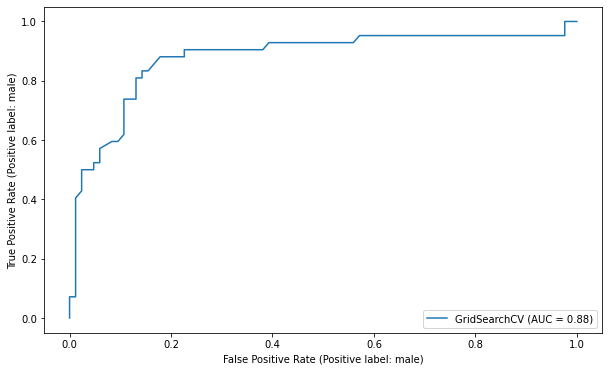

In [55]:
plot_roc_curve(log_model_grid, X_test, y_test,pos_label="male")


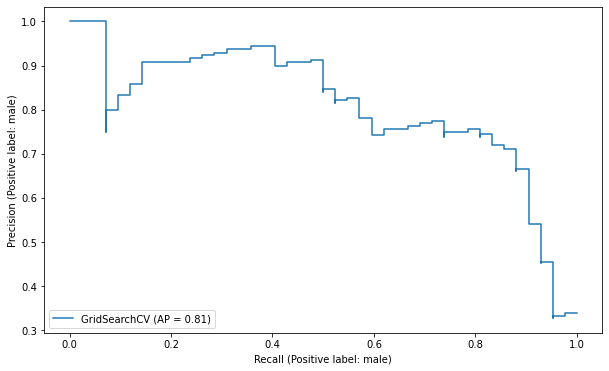

In [56]:
disp = plot_precision_recall_curve(log_model_grid, X_test, y_test,pos_label="male")

## XGBClassifier

In [57]:
X = df1.drop("gender", axis = 1)
y = df1.gender

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify = y, random_state=101)

In [59]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from xgboost import XGBClassifier

In [61]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.75433912, 1.48293963, 1.48293963, ..., 0.75433912, 1.48293963,
       1.48293963])

In [62]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label   0       
female  0.754339    749
male    1.482940    381
Name: 0, dtype: int64

In [63]:
xgb_model = XGBClassifier()

In [64]:
xgb_model.fit(X_train_scaled,y_train,sample_weight=classes_weights)

[18:53:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")

In [66]:
eval_metric(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[67 17]
 [10 32]]
              precision    recall  f1-score   support

      female       0.87      0.80      0.83        84
        male       0.65      0.76      0.70        42

    accuracy                           0.79       126
   macro avg       0.76      0.78      0.77       126
weighted avg       0.80      0.79      0.79       126


Train_Set
[[660  89]
 [ 55 326]]
              precision    recall  f1-score   support

      female       0.92      0.88      0.90       749
        male       0.79      0.86      0.82       381

    accuracy                           0.87      1130
   macro avg       0.85      0.87      0.86      1130
weighted avg       0.88      0.87      0.87      1130



### Gridsearch for XGBClassifier

In [67]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[1,2],
              "learning_rate": [0.01,0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [68]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring="f1_macro", 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train_scaled, y_train,sample_weight=classes_weights)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[18:53:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 50,
 'subsample': 1}

In [70]:
xgb_grid_model.best_score_

0.8115714484567864

In [71]:
y_pred = xgb_grid_model.predict(X_test_scaled)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_f1 = f1_score(y_test, y_pred, average = "macro")

In [72]:
eval_metric(xgb_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[70 14]
 [ 7 35]]
              precision    recall  f1-score   support

      female       0.91      0.83      0.87        84
        male       0.71      0.83      0.77        42

    accuracy                           0.83       126
   macro avg       0.81      0.83      0.82       126
weighted avg       0.84      0.83      0.84       126


Train_Set
[[632 117]
 [ 70 311]]
              precision    recall  f1-score   support

      female       0.90      0.84      0.87       749
        male       0.73      0.82      0.77       381

    accuracy                           0.83      1130
   macro avg       0.81      0.83      0.82      1130
weighted avg       0.84      0.83      0.84      1130



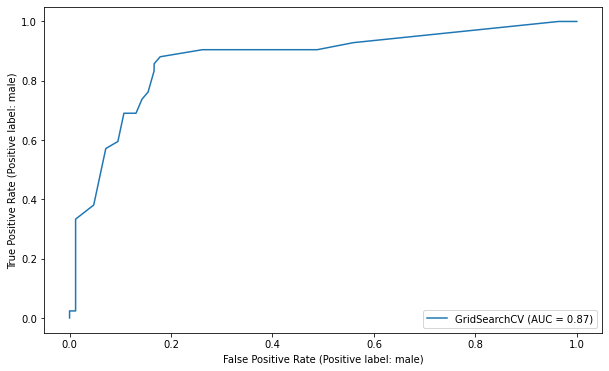

In [73]:
plot_roc_curve(xgb_grid_model, X_test_scaled, y_test,pos_label="male")

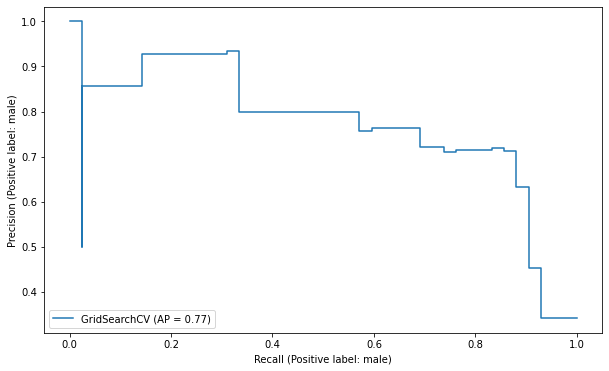

In [74]:
disp = plot_precision_recall_curve(xgb_grid_model, X_test_scaled, y_test,pos_label="male")

### Compare Classification Models   (Logistic regression and XGBClassifier)

In [75]:
compare = pd.DataFrame({"Model": ['log_model','log_grid_model','XGBClassifier','XGBClassifier_grid'],
                        "F1_Score": [l_f1, l_grid_f1, xgb_f1, xgb_grid_f1] })
compare

,Model,F1_Score
0,log_model,0.828804
1,log_grid_model,0.828804
2,XGBClassifier,0.767797
3,XGBClassifier_grid,0.819398


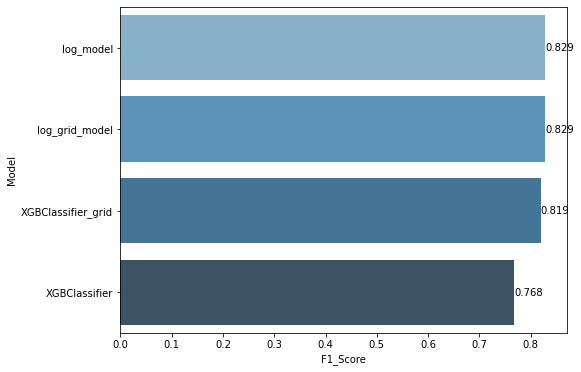

In [76]:
compare = pd.DataFrame({"Model": ['log_model','log_grid_model','XGBClassifier','XGBClassifier_grid'],
                        "F1_Score": [l_f1, l_grid_f1, xgb_f1, xgb_grid_f1] })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(8,6))

compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.show()

### Prediction 

In [77]:
data = {"speed" : 77, "height" : 72}

dataframe = pd.DataFrame(data =data,index =[0])
dataframe

,speed,height
0,77,72


In [78]:

print(xgb_grid_model.predict(dataframe))
print(xgb_grid_model.predict_proba(dataframe)) 

['male']
[[0.05217183 0.9478282 ]]


In [79]:
print(log_model_grid.predict(dataframe))
print(log_model_grid.predict_proba(dataframe))

['male']
[[0.09919874 0.90080126]]


# Regression  modelling

http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [80]:
df2 = pd.read_csv("airfoil_self_noise.csv", sep="\t",header=None)

## Data Exploration and Feature Engineering 

In [81]:
df2.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [82]:
df2.columns = ["Frequency","Angle of attack","Chord_Length","Free_stream_velocity","Displacement_thickness","Scaled_sound_pressure_level"]

In [83]:
df2.head()

,Frequency,Angle of attack,Chord_Length,Free_stream_velocity,Displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [84]:
df2.shape

(1503, 6)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Frequency                    1503 non-null   int64  
 1   Angle of attack              1503 non-null   float64
 2   Chord_Length                 1503 non-null   float64
 3   Free_stream_velocity         1503 non-null   float64
 4   Displacement_thickness       1503 non-null   float64
 5   Scaled_sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [86]:
df2.isnull().sum()

Frequency                      0
Angle of attack                0
Chord_Length                   0
Free_stream_velocity           0
Displacement_thickness         0
Scaled_sound_pressure_level    0
dtype: int64

In [87]:
df2.duplicated().sum()

0

In [88]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Angle of attack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
Chord_Length,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Free_stream_velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Displacement_thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Scaled_sound_pressure_level,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


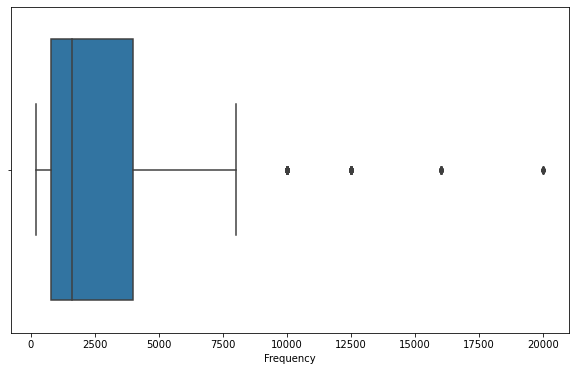

In [89]:
sns.boxplot(df2.Frequency);

In [90]:
df2.corr()['Scaled_sound_pressure_level'][:-1].sort_values()

Frequency                -0.390711
Displacement_thickness   -0.312670
Chord_Length             -0.236162
Angle of attack          -0.156108
Free_stream_velocity      0.125103
Name: Scaled_sound_pressure_level, dtype: float64

<AxesSubplot:>

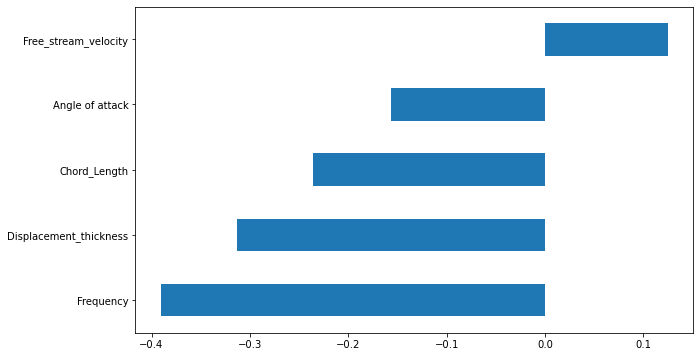

In [91]:
df2.corr()['Scaled_sound_pressure_level'][:-1].sort_values().plot.barh()

<AxesSubplot:>

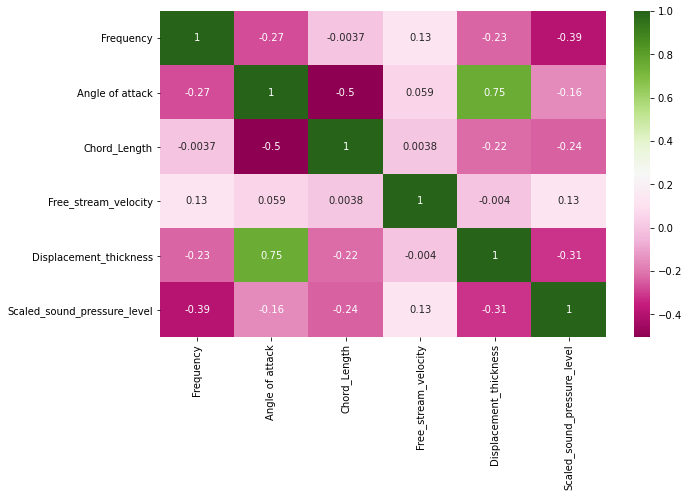

In [92]:
sns.heatmap(df2.corr(),annot = True,cmap="PiYG")

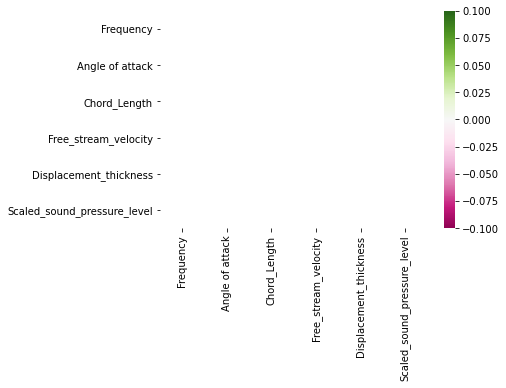

In [93]:
dfCorr = df2.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(6,4))
sns.heatmap(filteredDf, annot=True,cmap="PiYG")
plt.show()

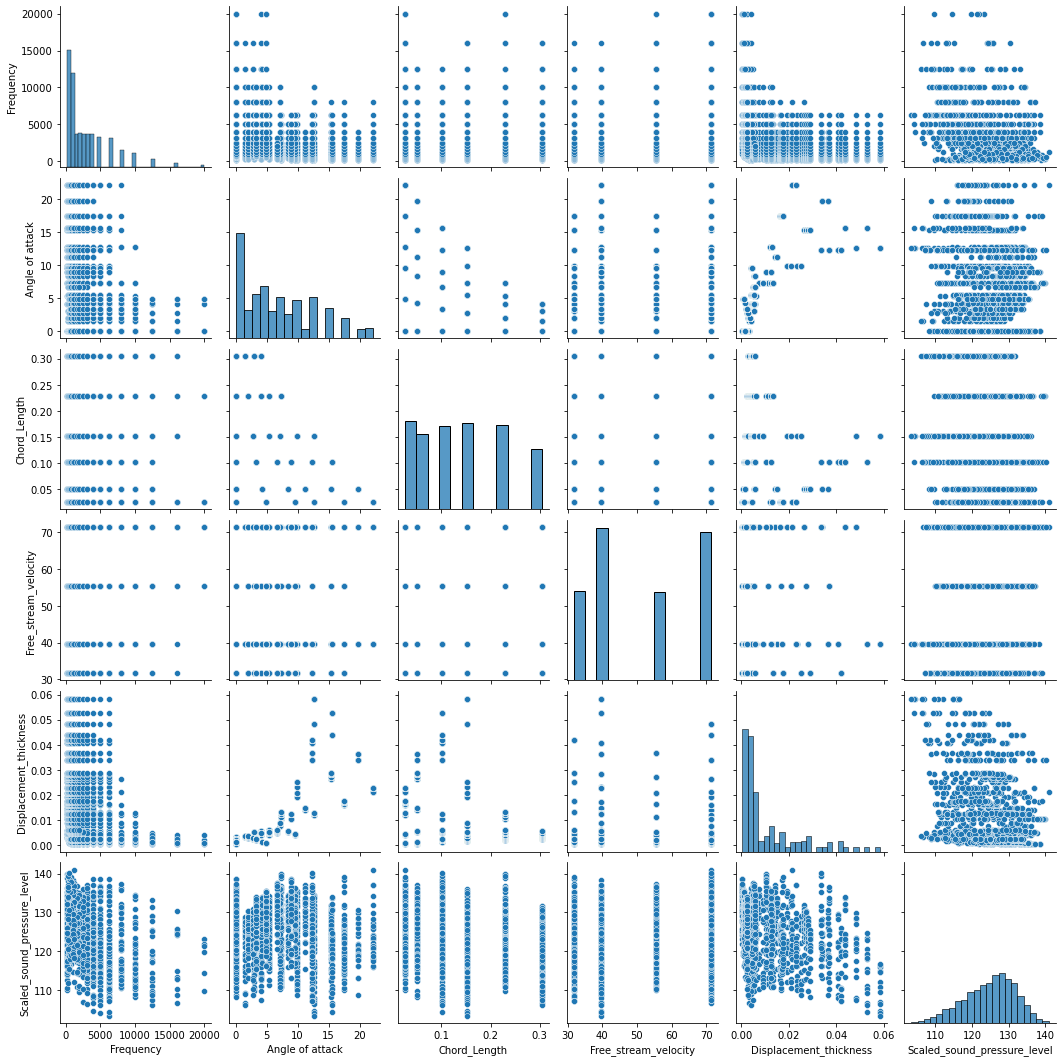

In [94]:
sns.pairplot(df2)

### User defined functions

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Train | Test Split

In [96]:
X = df2.drop("Scaled_sound_pressure_level", axis = 1)
y = df2.Scaled_sound_pressure_level

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

###  Scaling the Data

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [99]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

In [100]:
from sklearn.linear_model import Ridge
#Ridge ile modele hata(bias) ekleyerek train-test arası variance düşürüyoruz
# alpha büyüdükçe regularization artar

In [101]:
ridge_model = Ridge(alpha=1, random_state=42)
# büyük alpha büyük bias(hata) , yani büyük regularization demek

In [102]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [103]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [104]:
r = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
r

,ridge_train,ridge_test
R2,0.515576,0.509503
mae,3.775573,3.573990
mse,23.360464,21.847986
rmse,4.833266,4.674183


In [105]:
### alpha_space

In [106]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

### Gridsearch for Ridge

In [107]:
param_grid = {"alpha":alpha_space,}

In [108]:
ridge_grid = GridSearchCV(estimator = ridge_model, param_grid = param_grid , scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [109]:
ridge_grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.

[CV] END ..........................alpha=0.19090909090909092; total time=   0.0s
[CV] END ..........................alpha=0.19090909090909092; total time=   0.0s
[CV] END ..........................alpha=0.19090909090909092; total time=   0.0s
[CV] END ..........................alpha=0.19090909090909092; total time=   0.0s
[CV] END ..........................alpha=0.19090909090909092; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ..........................................alpha=0.3; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.3090909090909091; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.4181818181818182; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ...........................alpha=0.4363636363636364; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.5454545454545454; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.6545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.6545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.6545454545454545; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7454545454545454; total time=   0.0s
[CV] END ...........................alpha=0.7545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.7545454545454545; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.8545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.8545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.8545454545454545; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...........................alpha=0.8636363636363635; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9818181818181817; total time=   0.0s
[CV] END ...........................alpha=0.9909090909090909; total time=   0.0s
[CV] END ...........................alpha=0.9909090909090909; total time=   0.0s
[CV] END ...........................alpha=0.9909090909090909; total time=   0.0s
[CV] END ...........................alpha=0.9909090909090909; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(alpha=1, random_state=42),
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.3272727...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [110]:
ridge_grid.best_params_

{'alpha': 1.0}

In [111]:
y_pred = ridge_grid.predict(X_test_scaled)
y_train_pred = ridge_grid.predict(X_train_scaled)

In [112]:
r_grid = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_grid")
r_grid


,ridge_grid_train,ridge_grid_test
R2,0.515576,0.509503
mae,3.775573,3.573990
mse,23.360464,21.847986
rmse,4.833266,4.674183


In [113]:
pd.concat([r,r_grid], axis = 1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test
R2,0.515576,0.509503,0.515576,0.509503
mae,3.775573,3.573990,3.775573,3.573990
mse,23.360464,21.847986,23.360464,21.847986
rmse,4.833266,4.674183,4.833266,4.674183


## Lasso

In [114]:
from sklearn.linear_model import Lasso

In [115]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [116]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [117]:
l = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
# ridge modelle kıyasladığımızda underfitting görünüyor,fine tunning yaparak scores iyileştirebiliriz
l

,lasso_train,lasso_test
R2,0.363463,0.310675
mae,4.528096,4.442127
mse,30.695844,30.704322
rmse,5.540383,5.541148


In [118]:
pd.concat([r,r_grid,l], axis = 1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148


### Gridsearch for Lasso

In [119]:
lasso_grid = GridSearchCV(estimator = lasso_model, param_grid = param_grid , scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [120]:
lasso_grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1090909090909091; total time=   0.0s
[CV] END ...........................alpha=0.

[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ..........................alpha=0.26363636363636367; total time=   0.0s
[CV] END ...........................alpha=0.2727272727272727; total time=   0.0s
[CV] END ...........................alpha=0.2727272727272727; total time=   0.0s
[CV] END ...........................alpha=0.2727272727272727; total time=   0.0s
[CV] END ...........................alpha=0.2727272727272727; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ..........................alpha=0.42727272727272725; total time=   0.0s
[CV] END ...........................alpha=0.4363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.4363636363636364; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.5363636363636364; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636364; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636364; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.7181818181818181; total time=   0.0s
[CV] END ...........................alpha=0.7181818181818181; total time=   0.0s
[CV] END ...........................alpha=0.7181818181818181; total time=   0.0s
[CV] END ...........................alpha=0.7181818181818181; total time=   0.0s
[CV] END ...........................alpha=0.7181818181818181; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.7272727272727272; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8272727272727273; total time=   0.0s
[CV] END ...........................alpha=0.8363636363636363; total time=   0.0s
[CV] END ...........................alpha=0.8363636363636363; total time=   0.0s
[CV] END ...........................alpha=0.8363636363636363; total time=   0.0s
[CV] END ...........................alpha=0.8363636363636363; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9272727272727272; total time=   0.0s
[CV] END ...........................alpha=0.9363636363636363; total time=   0.0s
[CV] END ...........................alpha=0.9363636363636363; total time=   0.0s
[CV] END ...........................alpha=0.9363636363636363; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(alpha=1, random_state=42),
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.3272727...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [121]:
lasso_grid.best_params_

{'alpha': 0.1}

In [122]:
y_pred = lasso_grid.predict(X_test_scaled)
y_train_pred = lasso_grid.predict(X_train_scaled)

In [123]:
l_grid = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_grid")
l_grid


,lasso_grid_train,lasso_grid_test
R2,0.513731,0.502552
mae,3.807044,3.609983
mse,23.449455,22.157611
rmse,4.842464,4.707187


In [124]:
pd.concat([r,r_grid,l,l_grid], axis = 1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test,lasso_grid_train,lasso_grid_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675,0.513731,0.502552
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127,3.807044,3.609983
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322,23.449455,22.157611
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148,4.842464,4.707187


## KNN 

In [125]:
from sklearn.neighbors import KNeighborsRegressor


In [126]:
knn_model=KNeighborsRegressor(n_neighbors=5, weights='uniform',p=2,metric='minkowski', n_jobs=-1)


In [127]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1)

In [128]:
y_pred = knn_model.predict(X_test_scaled)
y_train_pred = knn_model.predict(X_train_scaled)

In [129]:
k5 = train_val(y_train, y_train_pred, y_test, y_pred, "5knn") 
# ridge modelle kıyasladığımızda underfitting görünüyor,fine tunning yaparak scores iyileştirebiliriz
k5

,5knn_train,5knn_test
R2,0.880698,0.756570
mae,1.791552,2.435278
mse,5.753145,10.842981
rmse,2.398571,3.292868


In [130]:
pd.concat([r,r_grid,l,l_grid,k5], axis = 1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test,lasso_grid_train,lasso_grid_test,5knn_train,5knn_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675,0.513731,0.502552,0.880698,0.756570
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127,3.807044,3.609983,1.791552,2.435278
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322,23.449455,22.157611,5.753145,10.842981
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148,4.842464,4.707187,2.398571,3.292868


### Elbow Method for Choosing Reasonable K Values

In [131]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 

    y_pred = knn_model.predict(X_test_scaled)
    
    
    # test_error = 1 - r2_score(y_test, y_pred)
    test_error = np.sqrt(mean_squared_error(y_test, y_pred))
    
    
    test_error_rates.append(test_error)
    

Text(0, 0.5, 'Error Rate')

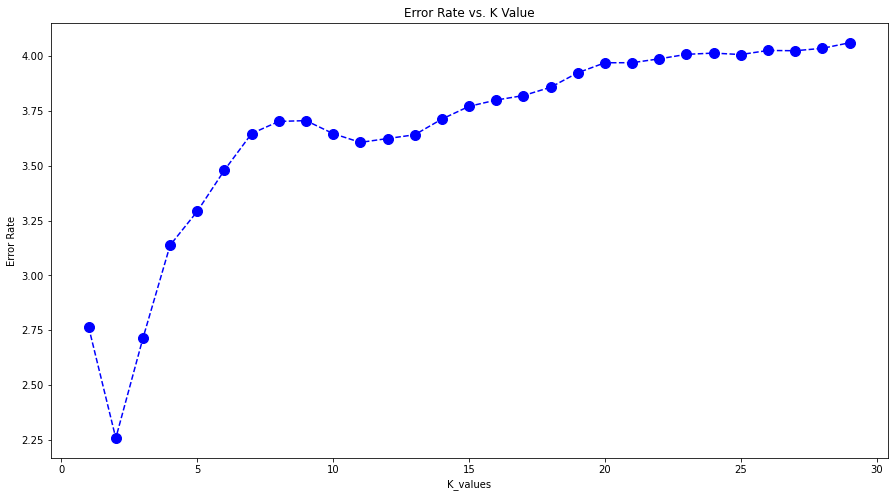

In [132]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')


In [133]:
knn_model=KNeighborsRegressor(n_neighbors=2, weights='uniform',p=2,metric='minkowski', n_jobs=-1)

In [134]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=2)

In [135]:
y_pred = knn_model.predict(X_test_scaled)
y_train_pred = knn_model.predict(X_train_scaled)

In [136]:
k2 = train_val(y_train, y_train_pred, y_test, y_pred, "2knn") 
# ridge modelle kıyasladığımızda underfitting görünüyor,fine tunning yaparak scores iyileştirebiliriz
k2

,2knn_train,2knn_test
R2,0.958613,0.885532
mae,1.084999,1.536643
mse,1.995813,5.098677
rmse,1.412732,2.258025


### Gridsearch for KNN

In [137]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [138]:
param_grid=[{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2], 'metric' : ['minkowski']}]

In [139]:
knn_grid = GridSearchCV(estimator = knn_model, param_grid = param_grid , scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [140]:
knn_grid.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkows

[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=4, p=2, weights=distance; total time=   0.0s


[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=7, p=2, weights=uniform; total time=  

[CV] END metric=minkowski, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=10, p=1, weights=uniform; total time= 

[CV] END metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=12, p=1, weights=distance; t

[CV] END metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=14, p=2, weights=distance; tot

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_jobs=-1, n_neighbors=2),
             param_grid=[{'metric': ['minkowski'],
                          'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [141]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [142]:
y_pred = knn_grid.predict(X_test_scaled)
y_train_pred = knn_grid.predict(X_train_scaled)

In [143]:
k_grid = train_val(y_train, y_train_pred, y_test, y_pred, "knn_grid") 
# ridge modelle kıyasladığımızda underfitting görünüyor,fine tunning yaparak scores iyileştirebiliriz
k_grid

,knn_grid_train,knn_grid_test
R2,1.0,0.894119
mae,0.0,1.473214
mse,0.0,4.716211
rmse,0.0,2.171684


In [144]:
pd.concat([r,r_grid,l,l_grid,k5,k2,k_grid], axis=1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test,lasso_grid_train,lasso_grid_test,5knn_train,5knn_test,2knn_train,2knn_test,knn_grid_train,knn_grid_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675,0.513731,0.502552,0.880698,0.756570,0.958613,0.885532,1.0,0.894119
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127,3.807044,3.609983,1.791552,2.435278,1.084999,1.536643,0.0,1.473214
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322,23.449455,22.157611,5.753145,10.842981,1.995813,5.098677,0.0,4.716211
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148,4.842464,4.707187,2.398571,3.292868,1.412732,2.258025,0.0,2.171684


## RandomForestRegressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train_scaled,y_train)


RandomForestRegressor(random_state=101)

In [147]:
y_pred = rf_model.predict(X_test_scaled)
y_train_pred = rf_model.predict(X_train_scaled)

In [148]:
rf = train_val(y_train, y_train_pred, y_test, y_pred, "rforest") 
rf

,rforest_train,rforest_test
R2,0.990757,0.925672
mae,0.469638,1.331997
mse,0.445705,3.310749
rmse,0.667611,1.819546


In [149]:
pd.concat([r,r_grid,l,l_grid,k5,k2,k_grid,rf], axis=1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test,lasso_grid_train,lasso_grid_test,5knn_train,5knn_test,2knn_train,2knn_test,knn_grid_train,knn_grid_test,rforest_train,rforest_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675,0.513731,0.502552,0.880698,0.756570,0.958613,0.885532,1.0,0.894119,0.990757,0.925672
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127,3.807044,3.609983,1.791552,2.435278,1.084999,1.536643,0.0,1.473214,0.469638,1.331997
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322,23.449455,22.157611,5.753145,10.842981,1.995813,5.098677,0.0,4.716211,0.445705,3.310749
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148,4.842464,4.707187,2.398571,3.292868,1.412732,2.258025,0.0,2.171684,0.667611,1.819546


### Gridsearch for RandomForestRegressor

In [150]:
param_grid = {"n_estimators":[200,300,400],
              "max_depth": [None,11,13],
              "min_samples_leaf": [1,3, 5],
              "min_samples_split": [2,4, 6],
              "max_features":['auto',2, 4, 6]} 
# max_features/3 yaptık modelin icat eden demiş
# 64 ve 128 modeli bulan tavsiye ediyor

In [151]:
rf_grid = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [152]:
rf_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 11, 13],
                         'max_features': ['auto', 2, 4, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_root_mean_squared_error')

In [153]:
rf_grid.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=400, random_state=101)

In [154]:
y_pred = rf_grid.predict(X_test_scaled)
y_train_pred = rf_grid.predict(X_train_scaled)

In [155]:
rf_grid = train_val(y_train, y_train_pred, y_test, y_pred, "rforest_grid") 
rf_grid

,rforest_grid_train,rforest_grid_test
R2,0.991463,0.929045
mae,0.455360,1.295570
mse,0.411700,3.160529
rmse,0.641638,1.777788


### Compare Regression Models (Ridge, Lasso, RandomForestRegressor, KNeighborsRegressor)

In [156]:
pd.concat([r,r_grid,l,l_grid,k5,k2,k_grid,rf,rf_grid],axis=1)

,ridge_train,ridge_test,ridge_grid_train,ridge_grid_test,lasso_train,lasso_test,lasso_grid_train,lasso_grid_test,5knn_train,5knn_test,2knn_train,2knn_test,knn_grid_train,knn_grid_test,rforest_train,rforest_test,rforest_grid_train,rforest_grid_test
R2,0.515576,0.509503,0.515576,0.509503,0.363463,0.310675,0.513731,0.502552,0.880698,0.756570,0.958613,0.885532,1.0,0.894119,0.990757,0.925672,0.991463,0.929045
mae,3.775573,3.573990,3.775573,3.573990,4.528096,4.442127,3.807044,3.609983,1.791552,2.435278,1.084999,1.536643,0.0,1.473214,0.469638,1.331997,0.455360,1.295570
mse,23.360464,21.847986,23.360464,21.847986,30.695844,30.704322,23.449455,22.157611,5.753145,10.842981,1.995813,5.098677,0.0,4.716211,0.445705,3.310749,0.411700,3.160529
rmse,4.833266,4.674183,4.833266,4.674183,5.540383,5.541148,4.842464,4.707187,2.398571,3.292868,1.412732,2.258025,0.0,2.171684,0.667611,1.819546,0.641638,1.777788


### Feature Importance

In [157]:
rf_model = RandomForestRegressor(max_features=4, n_estimators=400, random_state=101)
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_features=4, n_estimators=400, random_state=101)

In [158]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
df_f_i

,Feature Importance
Frequency,0.406003
Displacement_thickness,0.384797
Chord_Length,0.109630
Angle of attack,0.059389
Free_stream_velocity,0.040181


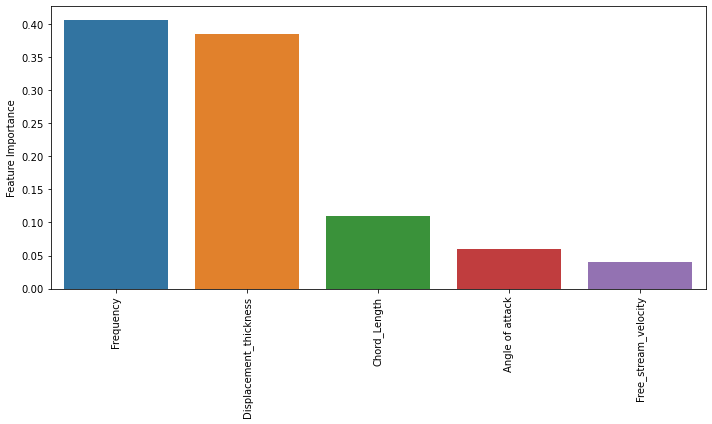

In [159]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()